In [494]:
#!pip install pandas
#!pip install wordcloud

In [495]:
# importamos las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator
import warnings
warnings.filterwarnings("ignore")

In [496]:
# cargar el documento csv con pd.read_csv, creando el dataframe
df = pd.read_csv('/Users/stam/Documents/Documents_MacBook_Eduardo/GitHub/spider/species_export_20241228.csv')

In [497]:
# columnas de dataframe
df.columns

Index(['speciesId', 'species_lsid', 'family', 'genus', 'species', 'subspecies',
       'author', 'year', 'parentheses', 'distribution'],
      dtype='object')

In [498]:
# identifica el tipo de datos de cada variable.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52598 entries, 0 to 52597
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   speciesId     52598 non-null  int64 
 1   species_lsid  52598 non-null  object
 2   family        52598 non-null  object
 3   genus         52598 non-null  object
 4   species       52598 non-null  object
 5   subspecies    441 non-null    object
 6   author        52598 non-null  object
 7   year          52598 non-null  int64 
 8   parentheses   52598 non-null  int64 
 9   distribution  52597 non-null  object
dtypes: int64(3), object(7)
memory usage: 4.0+ MB


In [499]:
# dimensión del dataframe
df.shape

(52598, 10)

In [500]:
# Muestra las primeras filas del dataframe
df.head(5)

,speciesId,species_lsid,family,genus,species,subspecies,author,year,parentheses,distribution
0,1,urn:lsid:nmbe.ch:spidersp:000896,Actinopodidae,Actinopus,caraiba,NaN,Simon,1889,1,Venezuela
1,2,urn:lsid:nmbe.ch:spidersp:000898,Actinopodidae,Actinopus,crassipes,NaN,Keyserling,1891,1,"Brazil, Paraguay, Argentina"
2,3,urn:lsid:nmbe.ch:spidersp:000899,Actinopodidae,Actinopus,cucutaensis,NaN,Mello-Leitão,1941,0,"Colombia, Venezuela, Brazil"
3,4,urn:lsid:nmbe.ch:spidersp:000900,Actinopodidae,Actinopus,dubiomaculatus,NaN,Mello-Leitão,1923,0,Brazil
4,5,urn:lsid:nmbe.ch:spidersp:000901,Actinopodidae,Actinopus,echinus,NaN,Mello-Leitão,1949,0,Brazil


In [501]:
# se verifica la completitud de las variables (valores nulos existentes).
# se utiliza la función .sum() para sumar los elementos que están vacíos (.isnull()).
nulos = df.isnull().sum()

# calculo del porcentaje de completitud.
completitud = pd.DataFrame(100 - (nulos / len(df) * 100))

# reset_index se utiliza para resetear los índices.
# inplace = True sirve para evitar la repetición.
completitud.reset_index(inplace = True)
# se coloan encebezados.
completitud = completitud.rename(columns = {"index":"variable",0:"completitud"})

# ordenamos las columnas con menor completitud en adelante.
completitud.sort_values(by ='completitud', ascending = True)
completitud

,variable,completitud
0,speciesId,100.000000
1,species_lsid,100.000000
2,family,100.000000
3,genus,100.000000
4,species,100.000000
5,subspecies,0.838435
6,author,100.000000
7,year,100.000000
8,parentheses,100.000000
9,distribution,99.998099


In [502]:
# eliminacion de los datos duplicados.
df.drop_duplicates(inplace=True)
df = df.dropna(subset=['distribution'])

In [503]:
# se verifica la completitud de las variables (valores nulos existentes).
# se utiliza la función .sum() para sumar los elementos que están vacíos (.isnull()).
nulos = df.isnull().sum()

# calculo del porcentaje de completitud.
completitud = pd.DataFrame(100 - (nulos / len(df) * 100))

# reset_index se utiliza para resetear los índices.
# inplace = True sirve para evitar la repetición.
completitud.reset_index(inplace = True)
# se coloan encebezados.
completitud = completitud.rename(columns = {"index":"variable",0:"completitud"})

# ordenamos las columnas con menor completitud en adelante.
completitud.sort_values(by ='completitud', ascending = True)
completitud

,variable,completitud
0,speciesId,100.000000
1,species_lsid,100.000000
2,family,100.000000
3,genus,100.000000
4,species,100.000000
5,subspecies,0.838451
6,author,100.000000
7,year,100.000000
8,parentheses,100.000000
9,distribution,100.000000


In [504]:
df.shape

(52597, 10)

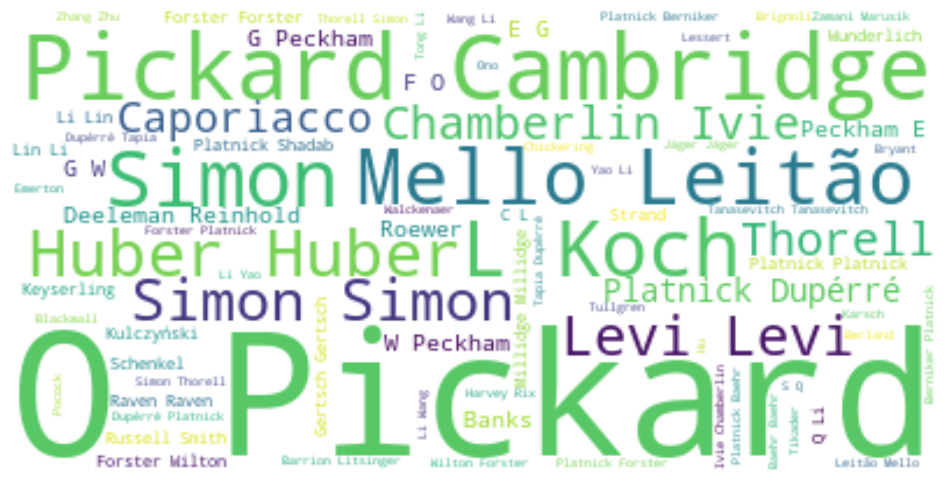

In [505]:
#word cloud
# Generar el texto a partir de los autores
text = " ".join(df['author'].astype(str))

# Crear la nube de palabras
wordcloud = WordCloud(
    max_words=200,
    max_font_size=100,
    colormap='viridis',
    background_color="white"
).generate(text)

# Configurar y mostrar el gráfico
plt.figure(figsize=(12, 8))  # Establecer el tamaño de la figura
plt.imshow(wordcloud, interpolation='bilinear')  # Mostrar la nube de palabras
plt.axis("off")  # Ocultar ejes
plt.show()  # Mostrar la figura

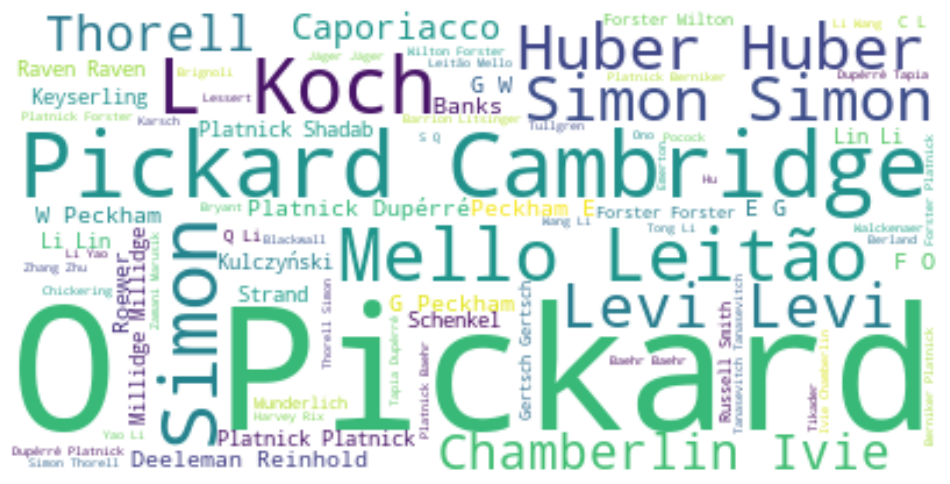

In [506]:
# Paso 1: Trabajar directamente con la columna 'author' sin modificar el DataFrame
authors_column = df['author'].astype(str).str.replace("&", ",", regex=False)  # Reemplazar & con ,
authors_list = authors_column.str.split(',').explode()  # Dividir por "," y "explode" para separar nombres en filas

# Paso 2: Eliminar espacios adicionales y NaN
authors_list = authors_list.str.strip()  # Quitar espacios al inicio y al final
authors_list = authors_list.dropna()  # Eliminar valores NaN

# Paso 3: Generar el texto para la nube de palabras
text = " ".join(authors_list)

# Paso 4: Crear la nube de palabras
wordcloud = WordCloud(
    max_words=200,
    max_font_size=100,
    colormap='viridis',
    background_color="white"
).generate(text)

# Paso 5: Configurar y mostrar el gráfico
plt.figure(figsize=(12, 8))  # Establecer el tamaño de la figura
plt.imshow(wordcloud, interpolation='bilinear')  # Mostrar la nube de palabras
plt.axis("off")  # Ocultar ejes
plt.show()  # Mostrar la figura

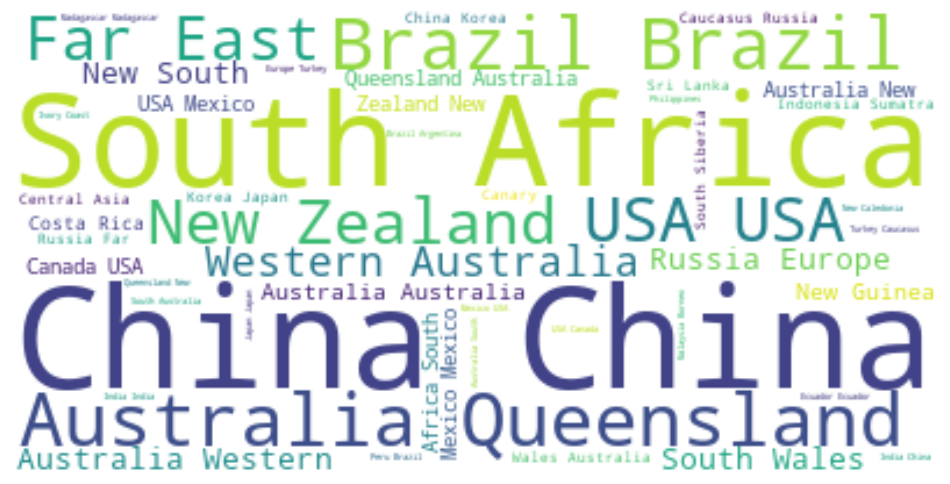

In [587]:
#word cloud
# Generar el texto a partir de los autores
text = " ".join(df['distribution'].astype(str))

# Crear la nube de palabras
wordcloud = WordCloud(
    max_words=50,
    max_font_size=100,
    colormap='viridis',
    background_color="white"
).generate(text)

# Configurar y mostrar el gráfico
plt.figure(figsize=(12, 8))  # Establecer el tamaño de la figura
plt.imshow(wordcloud, interpolation='bilinear')  # Mostrar la nube de palabras
plt.axis("off")  # Ocultar ejes
plt.show()  # Mostrar la figura

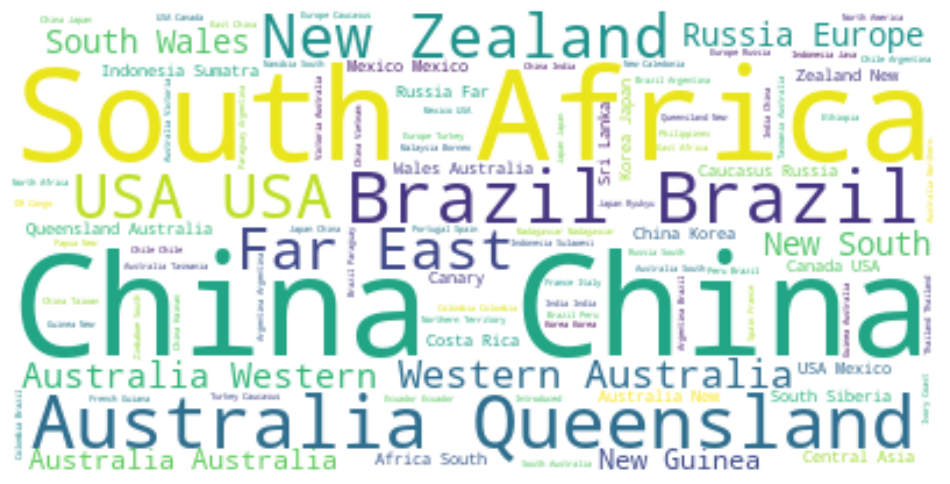

In [589]:
# Paso 1: Trabajar directamente con la columna 'author' sin modificar el DataFrame
distribution_column = df['distribution'].astype(str).str.replace("&", ",", regex=False)  # Reemplazar & con ,
distribution_list = distribution_column.str.split(',').explode()  # Dividir por "," y "explode" para separar nombres en filas

# Paso 2: Eliminar espacios adicionales y NaN
distribution_list = distribution_list.str.strip()  # Quitar espacios al inicio y al final
distribution_list = distribution_list.dropna()  # Eliminar valores NaN

# Paso 3: Generar el texto para la nube de palabras
text = " ".join(distribution_list)

# Paso 4: Crear la nube de palabras
wordcloud = WordCloud(
    max_words=200,
    max_font_size=100,
    colormap='viridis',
    background_color="white"
).generate(text)

# Paso 5: Configurar y mostrar el gráfico
plt.figure(figsize=(12, 8))  # Establecer el tamaño de la figura
plt.imshow(wordcloud, interpolation='bilinear')  # Mostrar la nube de palabras
plt.axis("off")  # Ocultar ejes
plt.show()  # Mostrar la figura

In [507]:
# Filtrar las arañas encontradas en México y otros paises
df_mexico_world = df[df['distribution'].str.contains('Mexico', na=False, case=False)]
# Mostrar las primeras filas del DataFrame filtrado
df_mexico_world.head(5)

,speciesId,species_lsid,family,genus,species,subspecies,author,year,parentheses,distribution
109,115,urn:lsid:nmbe.ch:spidersp:020904,Agelenidae,Agelenopsis,aperta,NaN,Gertsch,1934,1,"USA, Mexico"
193,204,urn:lsid:nmbe.ch:spidersp:020940,Agelenidae,Calilena,angelena,NaN,Chamberlin & Ivie,1941,0,"USA, Mexico"
194,205,urn:lsid:nmbe.ch:spidersp:020941,Agelenidae,Calilena,arizonica,NaN,Chamberlin & Ivie,1941,0,"USA, Mexico"
200,211,urn:lsid:nmbe.ch:spidersp:020947,Agelenidae,Calilena,peninsulana,NaN,Banks,1898,1,Mexico
726,746,urn:lsid:nmbe.ch:spidersp:021003,Agelenidae,Hololena,septata,NaN,Chamberlin & Ivie,1942,0,"USA, Mexico"


In [508]:
df_mexico_world.shape

(2370, 10)

In [509]:
# Filtrar las arañas encontradas en México y otros paises
df_mexico = df[df['distribution']== "Mexico"]
# Mostrar las primeras filas del DataFrame filtrado
df_mexico.head(5)

,speciesId,species_lsid,family,genus,species,subspecies,author,year,parentheses,distribution
200,211,urn:lsid:nmbe.ch:spidersp:020947,Agelenidae,Calilena,peninsulana,NaN,Banks,1898,1,Mexico
821,844,urn:lsid:nmbe.ch:spidersp:021060,Agelenidae,Melpomene,bicavata,NaN,F. O. Pickard-Cambridge,1902,1,Mexico
824,847,urn:lsid:nmbe.ch:spidersp:021063,Agelenidae,Melpomene,coahuilana,NaN,Gertsch & Davis,1940,1,Mexico
825,848,urn:lsid:nmbe.ch:spidersp:021064,Agelenidae,Melpomene,elegans,NaN,O. Pickard-Cambridge,1898,0,Mexico
831,854,urn:lsid:nmbe.ch:spidersp:021070,Agelenidae,Melpomene,singula,NaN,Gertsch & Ivie,1936,1,Mexico


In [510]:
#¿Cuántas especies únicas hay en México?
# Contar especies únicas
especies_unicas = df_mexico['species'].nunique()
print(f"Cantidad de especies únicas en México: {especies_unicas}")

Cantidad de especies únicas en México: 1180


In [511]:
#¿Cómo se distribuyen las arañas por género?
# Contar el número de especies por género
generos_mas_comunes = df_mexico['genus'].value_counts()

# Mostrar los géneros más comunes
print("Géneros más comunes en México:")
print(generos_mas_comunes.head(10))

Géneros más comunes en México:
genus
Novalena       43
Anyphaena      43
Anopsicus      35
Metagonia      33
Loxosceles     32
Ishania        31
Phonotimpus    31
Physocyclus    30
Mermessus      29
Araneus        27
Name: count, dtype: int64


In [512]:
#¿Cuántos géneros únicos hay en México?
# Contar géneros únicos
generos_unicos = df_mexico['genus'].nunique()
print(f"Cantidad de géneros únicos en México: {generos_unicos}")

Cantidad de géneros únicos en México: 286


In [513]:
#¿Cuáles son las familias más diversas?
# Contar el número de especies por familia
familias_mas_diversas = df_mexico['family'].value_counts()

# Mostrar las 10 familias más diversas
print("Familias más diversas en México:")
print(familias_mas_diversas.head(10))

Familias más diversas en México:
family
Pholcidae        166
Salticidae       105
Agelenidae        94
Theraphosidae     93
Oonopidae         84
Linyphiidae       69
Theridiidae       69
Gnaphosidae       66
Araneidae         66
Anyphaenidae      60
Name: count, dtype: int64


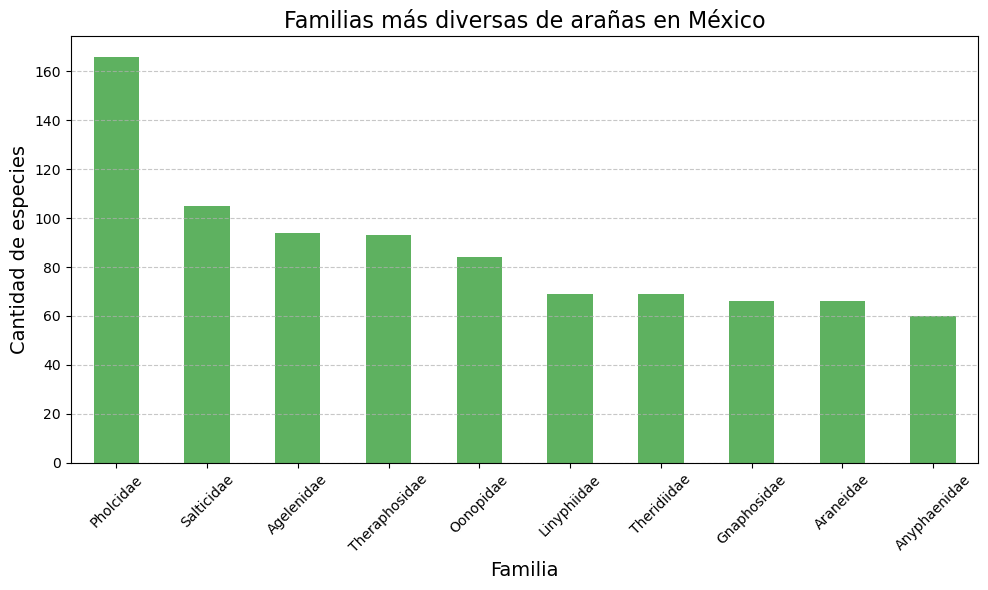

In [514]:
# Graficar las familias más diversas
familias_mas_diversas.head(10).plot(kind='bar', color='#5EB160', figsize=(10, 6))
plt.title('Familias más diversas de arañas en México', fontsize=16)
plt.xlabel('Familia', fontsize=14)
plt.ylabel('Cantidad de especies', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

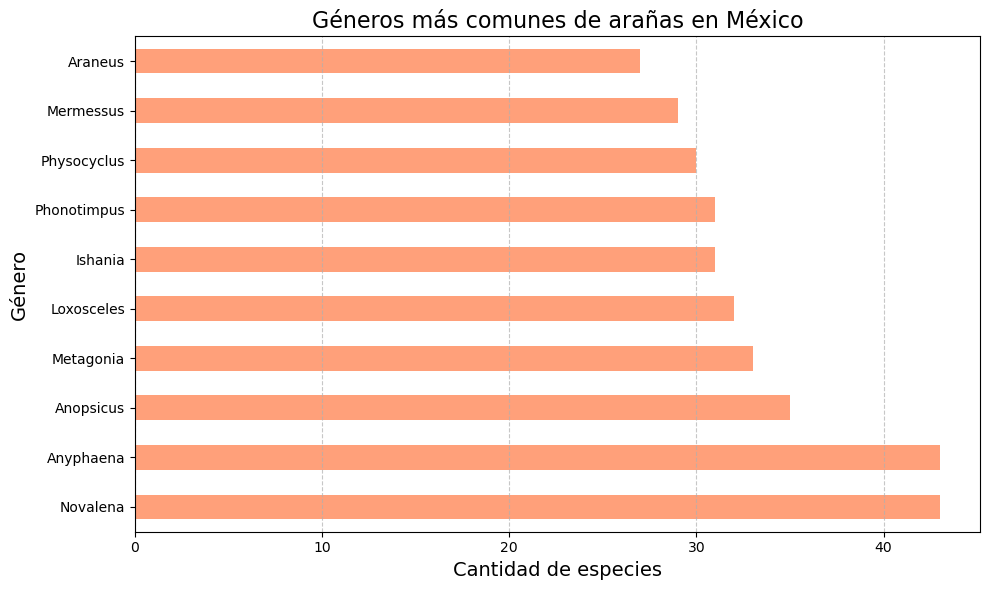

In [515]:
# Graficar los géneros más comunes
generos_mas_comunes.head(10).plot(kind='barh', color='#FFA07A', figsize=(10, 6))
plt.title('Géneros más comunes de arañas en México', fontsize=16)
plt.xlabel('Cantidad de especies', fontsize=14)
plt.ylabel('Género', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

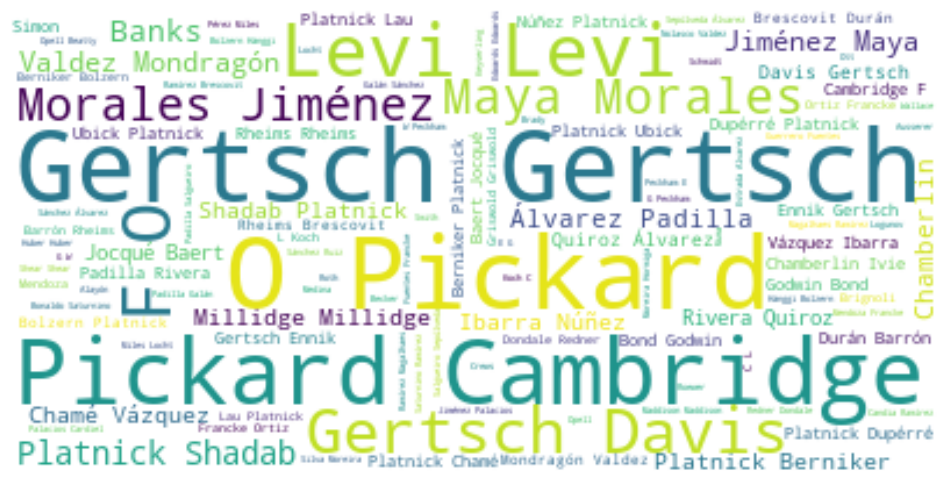

In [516]:
# Paso 1: Trabajar directamente con la columna 'author' sin modificar el DataFrame
authors_column = df_mexico['author'].astype(str).str.replace("&", ",", regex=False)  # Reemplazar & con ,
authors_list = authors_column.str.split(',').explode()  # Dividir por "," y "explode" para separar nombres en filas

# Paso 2: Eliminar espacios adicionales y NaN
authors_list = authors_list.str.strip()  # Quitar espacios al inicio y al final
authors_list = authors_list.dropna()  # Eliminar valores NaN

# Paso 3: Generar el texto para la nube de palabras
text = " ".join(authors_list)

# Paso 4: Crear la nube de palabras
wordcloud = WordCloud(
    max_words=200,
    max_font_size=100,
    colormap='viridis',
    background_color="white"
).generate(text)

# Paso 5: Configurar y mostrar el gráfico
plt.figure(figsize=(12, 8))  # Establecer el tamaño de la figura
plt.imshow(wordcloud, interpolation='bilinear')  # Mostrar la nube de palabras
plt.axis("off")  # Ocultar ejes
plt.show()  # Mostrar la figura

In [517]:
# Agrupar por género y contar la cantidad
conteo_genus = df_mexico['genus'].value_counts()
# Mostrar los datos agrupados
print(conteo_genus)

genus
Novalena       43
Anyphaena      43
Anopsicus      35
Metagonia      33
Loxosceles     32
               ..
Scaphioides     1
Heteroonops     1
Eidmannella     1
Mysmena         1
Falconina       1
Name: count, Length: 286, dtype: int64


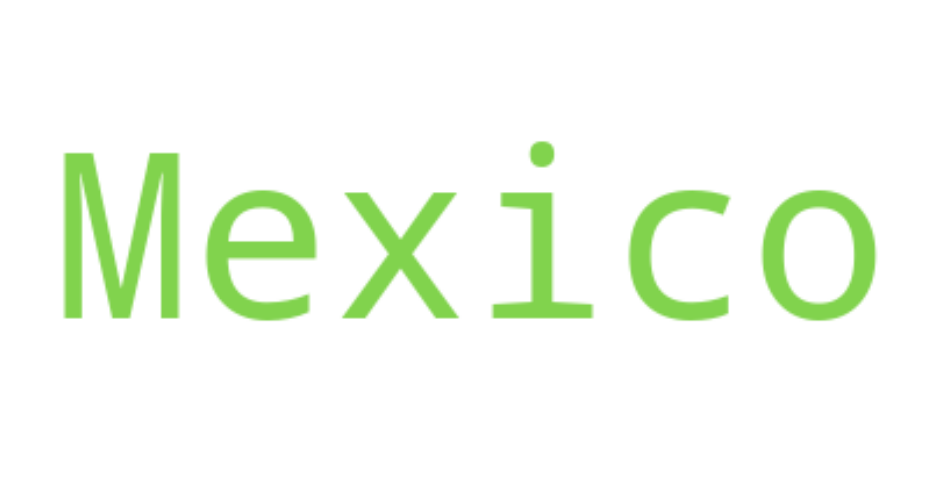

In [518]:
#word cloud
# Generar el texto a partir de los paises
text = " ".join(df_mexico['distribution'].astype(str))

# Crear la nube de palabras
wordcloud = WordCloud(
    max_words=200,
    max_font_size=100,
    colormap='viridis',
    background_color="white"
).generate(text)

# Configurar y mostrar el gráfico
plt.figure(figsize=(12, 8))  # Establecer el tamaño de la figura
plt.imshow(wordcloud, interpolation='bilinear')  # Mostrar la nube de palabras
plt.axis("off")  # Ocultar ejes
plt.show()  # Mostrar la figura

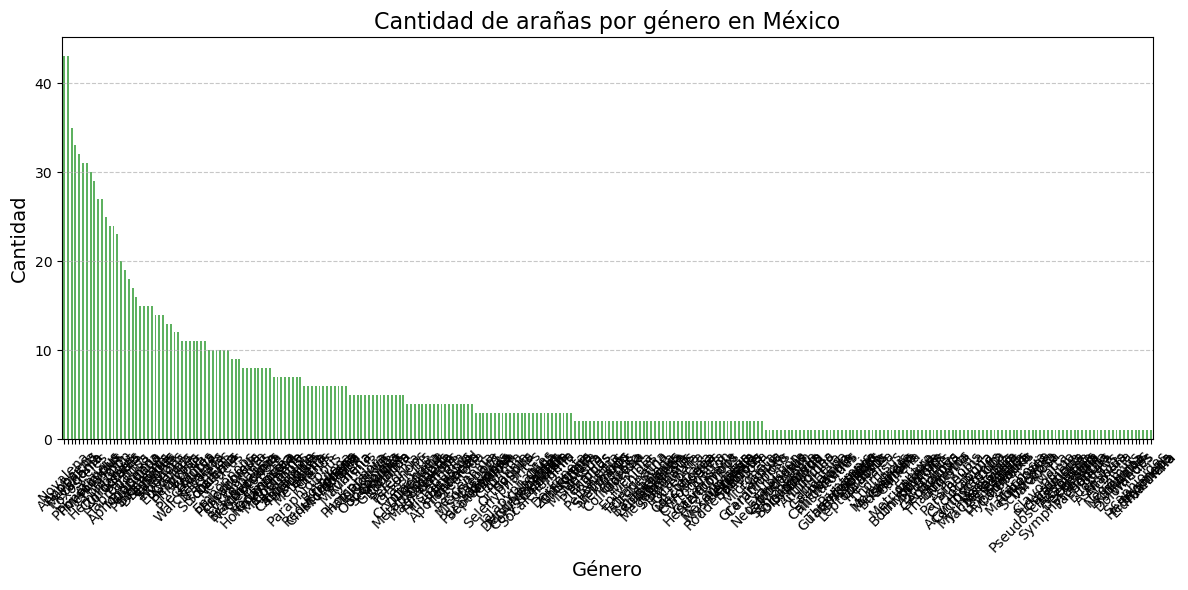

In [519]:
# Crear la gráfica de barras
plt.figure(figsize=(12, 6))
conteo_genus.plot(kind='bar', color='#5EB160')

# Personalizar la gráfica
plt.title('Cantidad de arañas por género en México', fontsize=16)
plt.xlabel('Género', fontsize=14)
plt.ylabel('Cantidad', fontsize=14)
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

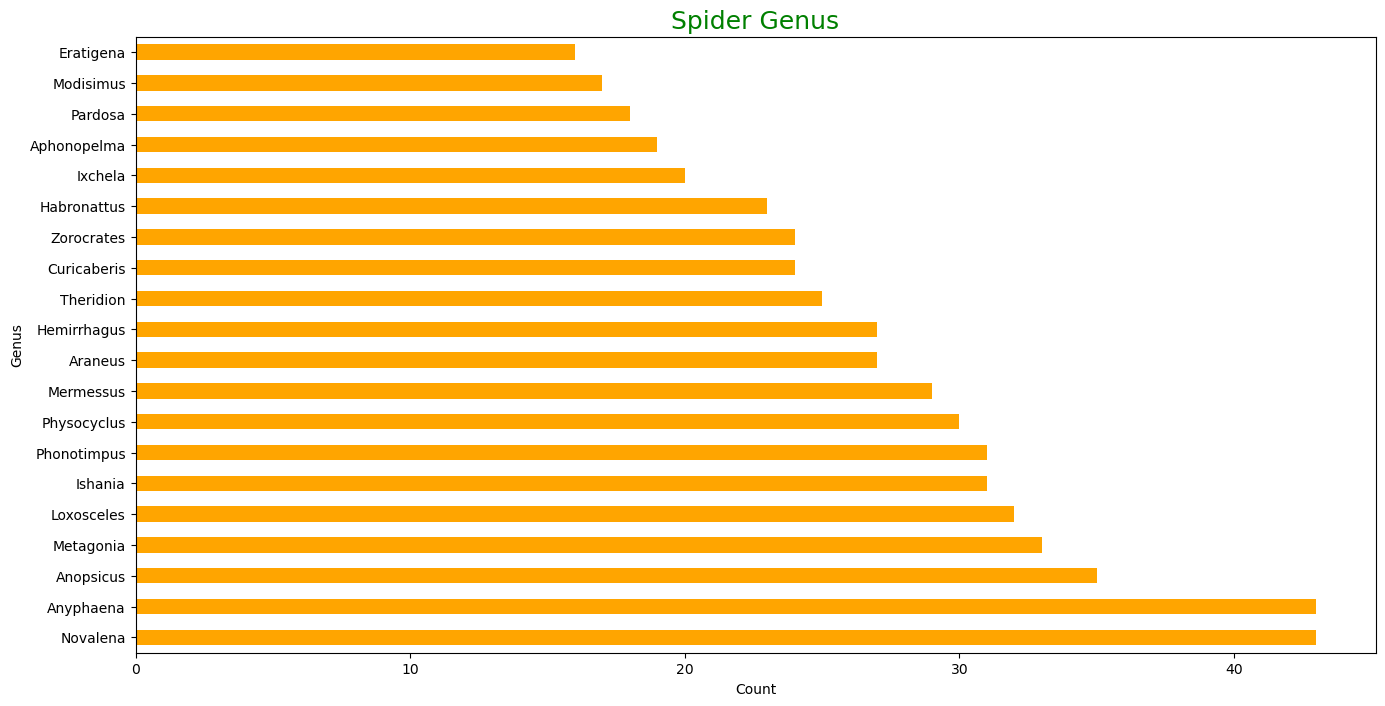

In [520]:
ax = df_mexico['genus'].value_counts()[:20].plot.barh(figsize=(16, 8), color='orange')
ax.set_title('Spider Genus', size=18, color='green')
ax.set_ylabel('Genus', size=10)
ax.set_xlabel('Count', size=10);

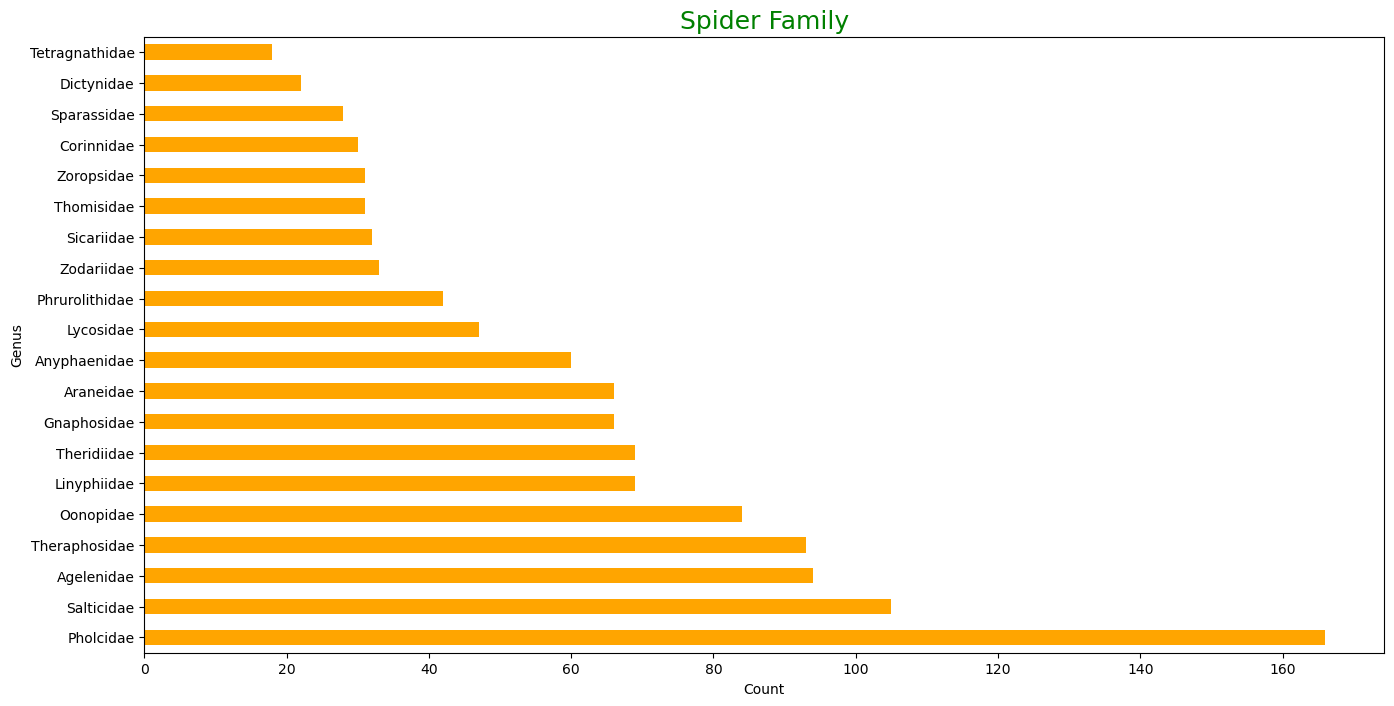

In [521]:
ax = df_mexico['family'].value_counts()[:20].plot.barh(figsize=(16, 8), color='orange')
ax.set_title('Spider Family', size=18, color='green')
ax.set_ylabel('Genus', size=10)
ax.set_xlabel('Count', size=10);

In [522]:
# Filtrar las filas donde 'distribution' sea 'Mexico' y 'family' sea 'Salticidae'
df_mexico_salticidae = df[
    (df['distribution']== 'Mexico') & 
    (df['family'] == 'Salticidae')
]

# Verificar cuántos registros hay en el nuevo DataFrame
print(f"Total de registros donde 'distribution' es 'Mexico' y 'family' es 'Salticidae': {len(df_mexico_salticidae)}")

Total de registros donde 'distribution' es 'Mexico' y 'family' es 'Salticidae': 105


In [523]:
# Mostrar las primeras filas del nuevo DataFrame
df_mexico_salticidae.head(5)

,speciesId,species_lsid,family,genus,species,subspecies,author,year,parentheses,distribution
27132,28092,urn:lsid:nmbe.ch:spidersp:032266,Salticidae,Alcmena,amabilis,NaN,C. L. Koch,1846,0,Mexico
27154,28114,urn:lsid:nmbe.ch:spidersp:032285,Salticidae,Amycus,flavolineatus,NaN,C. L. Koch,1846,0,Mexico
27172,28132,urn:lsid:nmbe.ch:spidersp:032299,Salticidae,Anicius,dolius,NaN,Chamberlin,1925,0,Mexico
27242,28205,urn:lsid:nmbe.ch:spidersp:032362,Salticidae,Ashtabula,glauca,NaN,Simon,1901,0,Mexico
27368,28336,urn:lsid:nmbe.ch:spidersp:032479,Salticidae,Beata,hispida,NaN,G. W. Peckham & E. G. Peckham,1901,1,Mexico


In [524]:
#¿Cuántos géneros únicos de Salticidae hay en México?
generos_unicos = df_mexico_salticidae['genus'].nunique()
print(f"Géneros únicos de Salticidae en México: {generos_unicos}")

Géneros únicos de Salticidae en México: 30


In [525]:
#¿Cuántas especies únicas de Salticidae hay en México?
especies_unicas = df_mexico_salticidae['species'].nunique()
print(f"Especies únicas de Salticidae en México: {especies_unicas}")

Especies únicas de Salticidae en México: 102


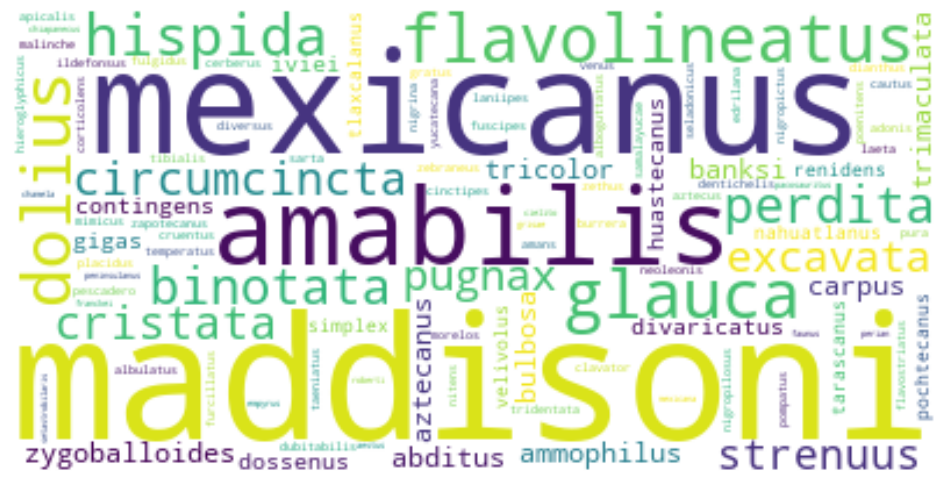

In [526]:
#word cloud
# Generar el texto a partir de las especies
text = " ".join(df_mexico_salticidae['species'].astype(str))

# Crear la nube de palabras
wordcloud = WordCloud(
    max_words=200,
    max_font_size=100,
    colormap='viridis',
    background_color="white"
).generate(text)

# Configurar y mostrar el gráfico
plt.figure(figsize=(12, 8))  # Establecer el tamaño de la figura
plt.imshow(wordcloud, interpolation='bilinear')  # Mostrar la nube de palabras
plt.axis("off")  # Ocultar ejes
plt.show()  # Mostrar la figura

Especies descritas por año:
year
1846    10
1880     1
1888     2
1889     1
1896     1
1898     7
1901    21
1924     5
1925     2
1948     2
1951     1
1980     3
1987    13
1993     2
1996     5
1999     2
2004     9
2008     2
2014     2
2015     1
2017     5
2019     5
2020     2
2021     1
Name: count, dtype: int64


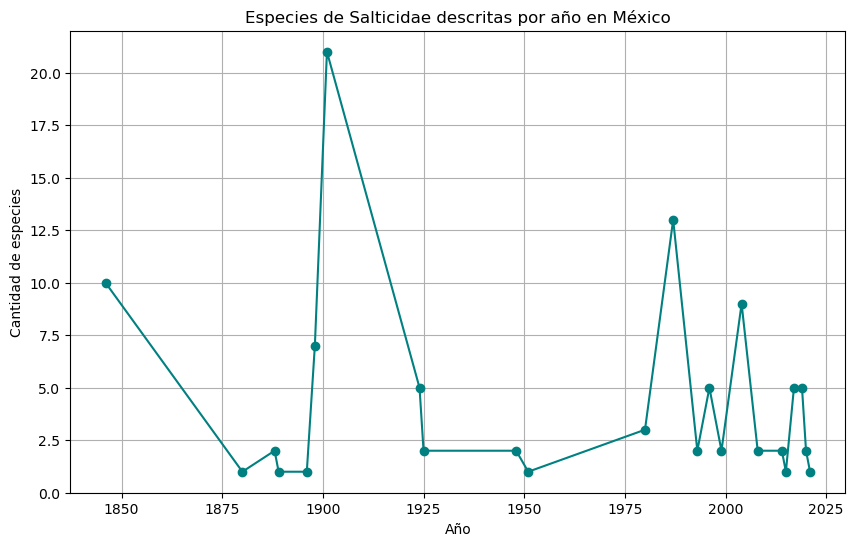

In [527]:
#¿Cómo ha cambiado el descubrimiento de especies a lo largo del tiempo?
# Contar el número de especies descritas por año
especies_por_ano = df_mexico_salticidae['year'].value_counts().sort_index()
print("Especies descritas por año:")
print(especies_por_ano)

# Graficar la tendencia
especies_por_ano.plot(kind='line', figsize=(10, 6), marker='o', color='teal')
plt.title("Especies de Salticidae descritas por año en México")
plt.xlabel("Año")
plt.ylabel("Cantidad de especies")
plt.grid(True)
plt.show()

In [528]:
#¿Cuál es el género con mayor cantidad de especies en México?
generos_mas_diversos = df_mexico_salticidae['genus'].value_counts()
print("Género con mayor cantidad de especies:")
print(generos_mas_diversos.head(1))

Género con mayor cantidad de especies:
genus
Habronattus    23
Name: count, dtype: int64


In [529]:
#¿Cuáles son los autores más frecuentes en la descripción de estas especies?
autores_frecuentes = df_mexico_salticidae['author'].value_counts()
print("Autores más frecuentes en la descripción de especies:")
print(autores_frecuentes.head(10))

Autores más frecuentes en la descripción de especies:
author
F. O. Pickard-Cambridge          18
Griswold                         13
C. L. Koch                       10
Edwards                          10
Maddison                          9
Banks                             7
Chamberlin                        7
G. W. Peckham & E. G. Peckham     5
Guerrero-Fuentes & Francke        5
Galiano                           3
Name: count, dtype: int64


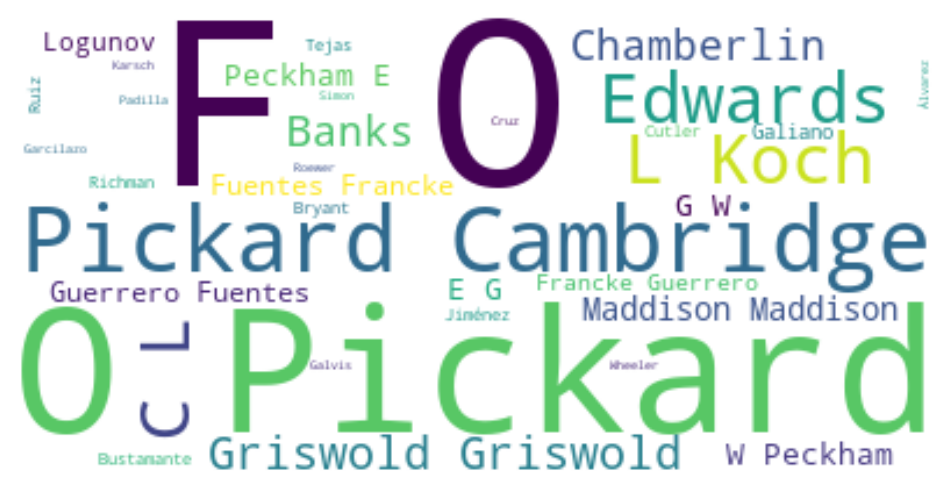

In [530]:
# Paso 1: Trabajar directamente con la columna 'author' sin modificar el DataFrame
authors_column = df_mexico_salticidae['author'].astype(str).str.replace("&", ",", regex=False)  # Reemplazar & con ,
authors_list = authors_column.str.split(',').explode()  # Dividir por "," y "explode" para separar nombres en filas

# Paso 2: Eliminar espacios adicionales y NaN
authors_list = authors_list.str.strip()  # Quitar espacios al inicio y al final
authors_list = authors_list.dropna()  # Eliminar valores NaN

# Paso 3: Generar el texto para la nube de palabras
text = " ".join(authors_list)

# Paso 4: Crear la nube de palabras
wordcloud = WordCloud(
    max_words=200,
    max_font_size=100,
    colormap='viridis',
    background_color="white"
).generate(text)

# Paso 5: Configurar y mostrar el gráfico
plt.figure(figsize=(12, 8))  # Establecer el tamaño de la figura
plt.imshow(wordcloud, interpolation='bilinear')  # Mostrar la nube de palabras
plt.axis("off")  # Ocultar ejes
plt.show()  # Mostrar la figura

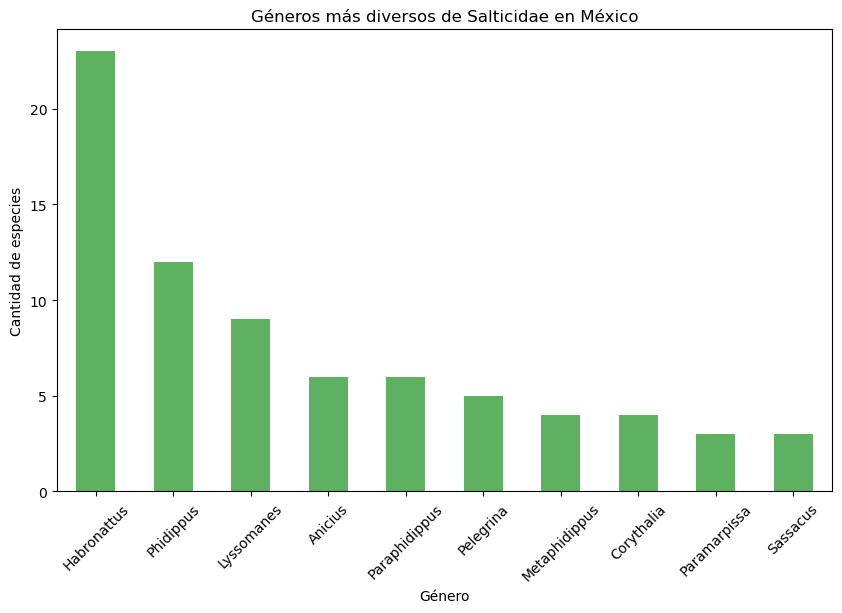

In [531]:
generos_mas_diversos.head(10).plot(kind='bar', color='#5EB160', figsize=(10, 6))
plt.title('Géneros más diversos de Salticidae en México')
plt.xlabel('Género')
plt.ylabel('Cantidad de especies')
plt.xticks(rotation=45)
plt.show()

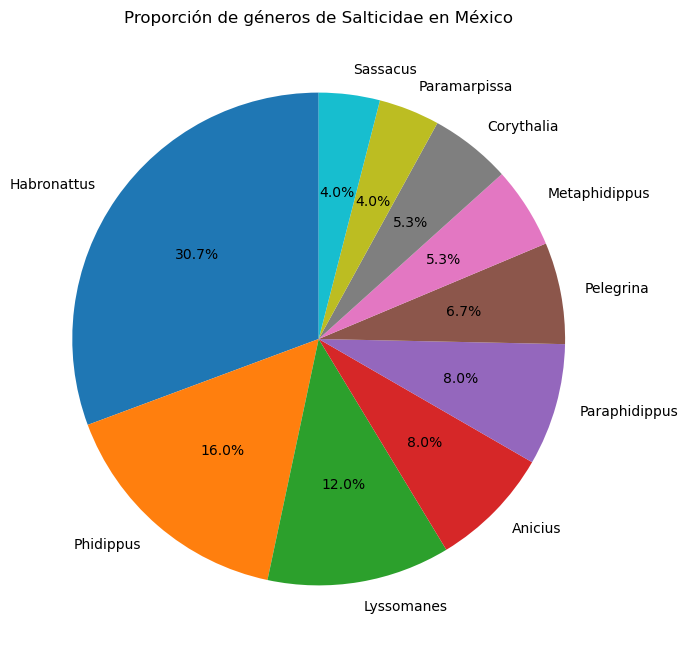

In [532]:
generos_mas_diversos.head(10).plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), startangle=90)
plt.title('Proporción de géneros de Salticidae en México')
plt.ylabel('')
plt.show()

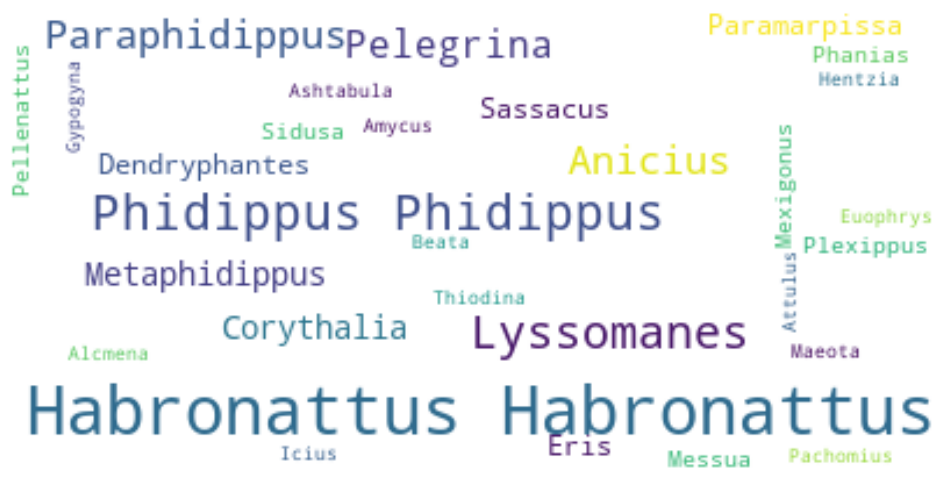

In [533]:
#word cloud
# Generar el texto a partir del genero
text = " ".join(df_mexico_salticidae['genus'].astype(str))

# Crear la nube de palabras
wordcloud = WordCloud(
    max_words=200,
    max_font_size=100,
    colormap='viridis',
    background_color="white"
).generate(text)

# Configurar y mostrar el gráfico
plt.figure(figsize=(12, 8))  # Establecer el tamaño de la figura
plt.imshow(wordcloud, interpolation='bilinear')  # Mostrar la nube de palabras
plt.axis("off")  # Ocultar ejes
plt.show()  # Mostrar la figura